In [1]:
import scvelo as scv
scv.__version__

'0.2.4'

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
# load data from scvelo
adata = scv.datasets.forebrain()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.2M/29.2M [00:03<00:00, 7.79MB/s]
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 26764 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
adata

AnnData object with n_obs × n_vars = 1720 × 2000
    obs: 'Clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_params'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_forebrain_streamline.png


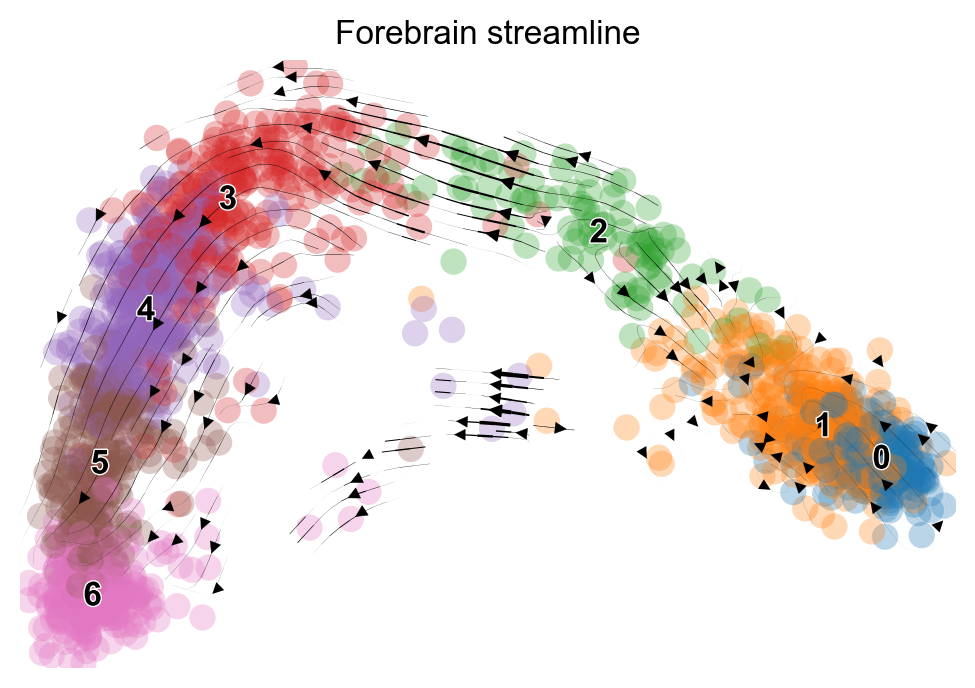

In [28]:
scv.pl.velocity_embedding_stream(adata, basis='pca',color='Clusters',title="Forebrain streamline", save= "forebrain_streamline.pdf")

saving figure to file ./figures/scvelo_forebrain_grid.pdf


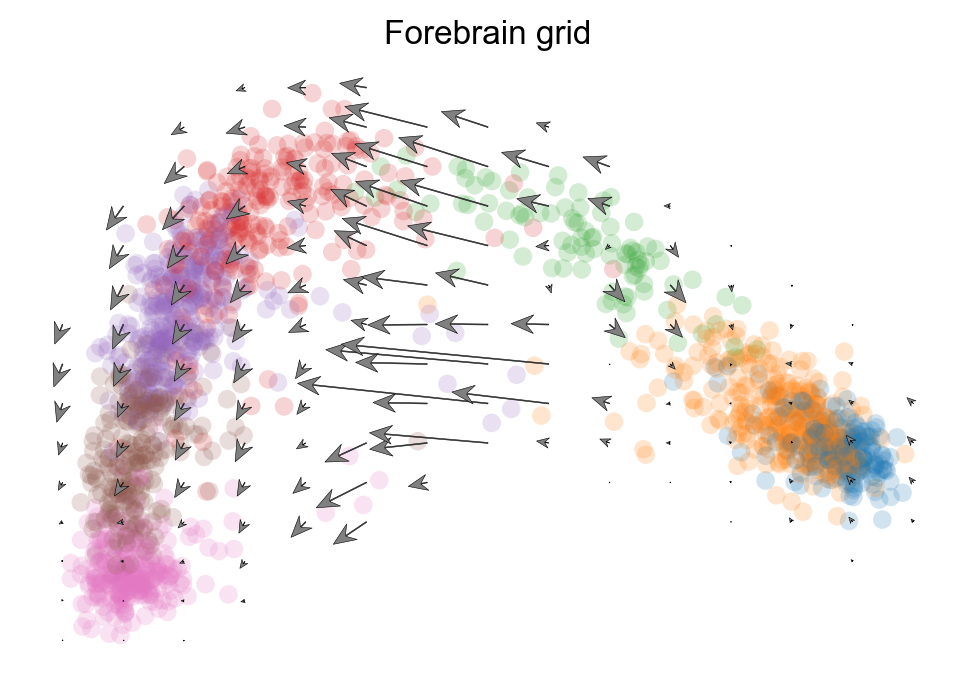

In [29]:
scv.pl.velocity_embedding_grid(adata, basis='pca',color='Clusters',title="Forebrain grid", arrow_size=4, density = 0.3, arrow_length = 3, save= "forebrain_grid.pdf")

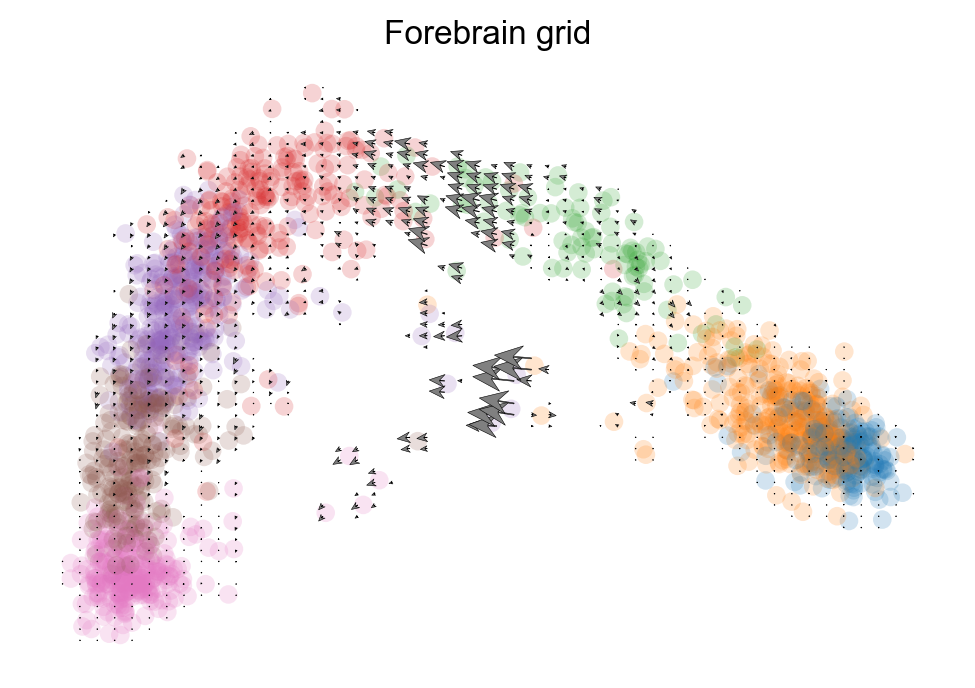

In [25]:
scv.pl.velocity_embedding_grid(adata, basis='pca',color='Clusters', title = "Forebrain grid", arrow_size=5)